# import libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.metrics import accuracy_score

# initial functions

In [3]:
# function to read pitch value frome file
# pitch is on second column of the file
def read_pitch(file_path):
    wav_id = []
    pitch = []
    p = []
    f = open(file_path, "r")
    for x in f:
        if '[' in x:
            wav_id.append(x.split('.')[0])
        elif ']' not in x:
            p.append(round(float(x.split(' ')[3]), 2))
        else: 
            p.append(round(float(x.split(' ')[3]), 2))
            pitch.append(p)
            p = []
    return wav_id, pitch

# function to read actor's gender and age from file
def actor_gender_age(file_path):
    f = open(file_path, "r")
    actor_id = []
    gender = []
    age = []
    for x in f:
        if "ActorID" not in x:
            actor_id.append(x.split(",")[0])
            g = x.split(",")[2].replace('"', '')
            gender.append(g)
            a = x.split(",")[1].replace('"', '')
            age.append(a)
    return actor_id, gender, age

# function to plot pitch graph by selected emotion and number of data point
def plot_pitch_gender(wav_id, gender, emotion, random_number):
    if emotion == 'ALL':
        wav_index = [i for i in range(len(wav_id))]
    elif emotion == 'NEU':
        wav_index = [i for i, e in enumerate(wav_id) if e[9:12] == 'NEU']
    elif emotion == 'ANG':
        wav_index = [i for i, e in enumerate(wav_id) if e[9:12] == 'ANG']
    elif emotion == 'DIS':
        wav_index = [i for i, e in enumerate(wav_id) if e[9:12] == 'DIS']
    elif emotion == 'FEA':
        wav_index = [i for i, e in enumerate(wav_id) if e[9:12] == 'FEA']
    elif emotion == 'HAP':
        wav_index = [i for i, e in enumerate(wav_id) if e[9:12] == 'HAP']
    elif emotion == 'SAD':
        wav_index = [i for i, e in enumerate(wav_id) if e[9:12] == 'SAD']
    else:
        print("error!! emotion input mismatch")

#         random wav index for ploting graph
    random_index = random.choices(wav_index, k=random_number)
        
    for i in random_index:
        if "Female" in gender[i]:
            color = "blue"
        else:
            color = "red"
        plt.plot(np.arange(1, len(pitch[i])+1, 1).tolist(), pitch[i], color=color)

    plt.xlabel('wav length')
    plt.ylabel('pitch')
    plt.show()
    
    return wav_index

# function to predict gender by selected range of pitch (RULE BASED)
def predict_gender(gender_pitch, select_pitch):
    predict = []
    for i in range(len(gender_pitch)):
        if gender_pitch[i][1] > select_pitch:
            predict.append('Female')
        else:
            predict.append('Male')
    return predict

# read files

In [4]:
# select path of files
pitch_path = "feats.txt"
profile_path = "VideoDemographics.csv"

# read data
wav_id, pitch = read_pitch(pitch_path)
actor_id, gender, _ = actor_gender_age(profile_path)

# preprocess data

In [5]:
actor_wav = []
gender_wav = []

# read actor (1-4 digits) from wav_id and map gender with wav_id
for w in wav_id:
    actor = w[:4]
    actor_wav.append(actor)
    
    actor_index = actor_id.index(actor)
    gender_wav.append(gender[actor_index])

# plot graph

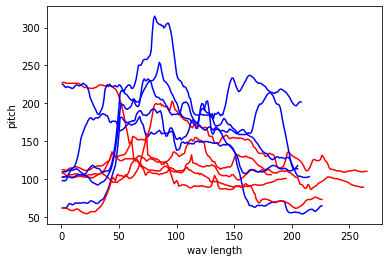

In [6]:
# plot_pitch_gender(wav_id, gender, emotion, random_number)
# emotion: 'ALL', 'NEU', 'ANG', 'DIS', 'FEA', 'HAP', 'SAD'
# return selected wav index

wav_index = plot_pitch_gender(wav_id, gender_wav, 'NEU', 10)

# calculate mean of pitch

In [7]:
# create x, y for model
# x: (gender, pitch)
# y_true: gender

x = []
y_true = []
for i in wav_index:
    p = pitch[i]
    w = wav_id[i]
    actor_index = actor_id.index(w[:4])
    list = [float(j) for j in p] 
    x.append((gender[actor_index], sum(list)/len(list)))
    y_true.append(gender[actor_index])

In [10]:
# calculate mean of pitch by gender

f_sum, m_sum = 0, 0
f, m = 0, 0
for i in x:
    if "Female" in i[0]:
        f_sum += i[1]
        f += 1
    else: 
        m_sum += i[1]
        m += 1

print('mean female', f_sum/f)
print('mean male', m_sum/m)

mean female 176.97285192708284
mean male 119.44920502271425


# predict gender

In [12]:
# predict_gender(x, select_pitch)
# select_pitch: the value of pitch used to separate gender
# return predicted emotion (y_predict)

y_predict = predict_gender(x, 150)

In [13]:
accuracy = accuracy_score(y_true, y_predict)
print(accuracy)

0.84360625574977
